In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
def empirical_cdf(sample):
  sorted_sample = np.sort(sample)
  cdf_empirical = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)
  return sorted_sample, cdf_empirical

In [79]:
def theoretical_cdf(x):
  return x

In [80]:
def ks_test(sample):
  D, p_value = stats.kstest(sample, 'uniform')
  return D, p_value

In [81]:
def chi_square_test(sample, bins=10):
  expected_freq = np.full(bins, len(sample) / bins)
  
  observed_freq, _ = np.histogram(sample, bins=bins, range=(0, 1))
  
  chi2_stat, p_value = stats.chisquare(observed_freq, expected_freq)
  return chi2_stat, p_value

In [82]:
N = 1000
np.random.seed(1234)
seeds = [int(np.random.rand()*10000) for i in range(3)]

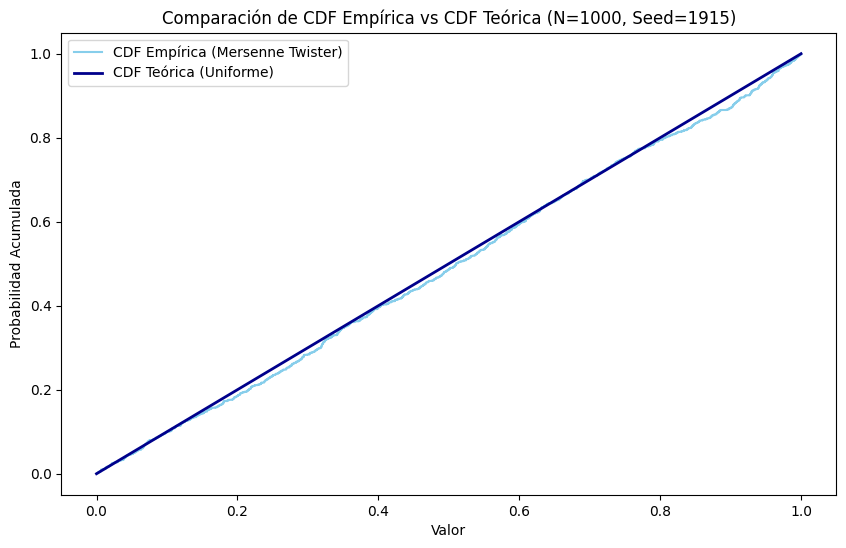

Resultados para Seed 1915:
  - Kolmogórov-Smirnov: D = 0.0301, p-value = 0.3178
  - Prueba Chi-cuadrado: Chi2 = 20.3600, p-value = 0.0158



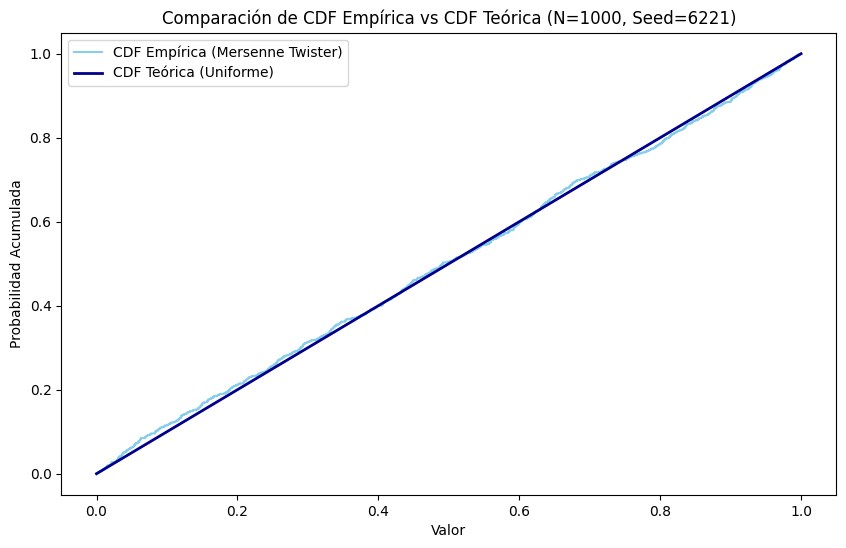

Resultados para Seed 6221:
  - Kolmogórov-Smirnov: D = 0.0219, p-value = 0.7146
  - Prueba Chi-cuadrado: Chi2 = 13.0400, p-value = 0.1608



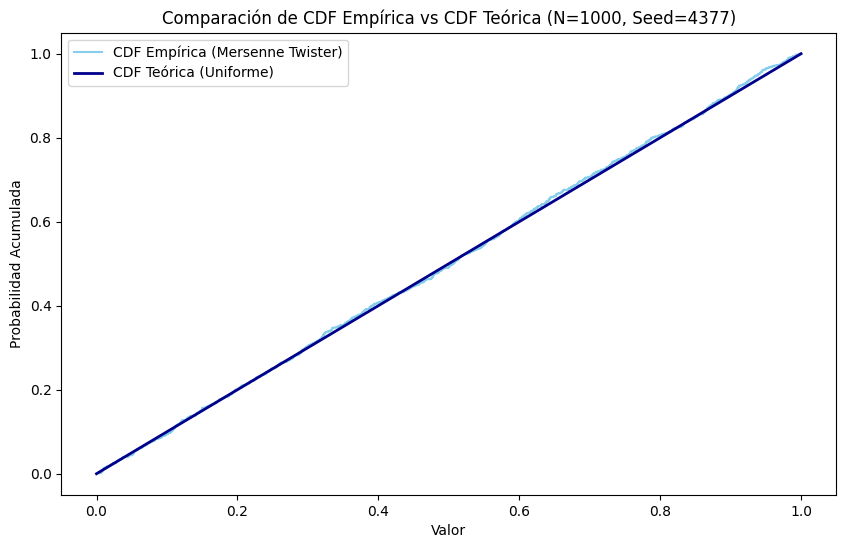

Resultados para Seed 4377:
  - Kolmogórov-Smirnov: D = 0.0158, p-value = 0.9606
  - Prueba Chi-cuadrado: Chi2 = 4.9400, p-value = 0.8395



In [83]:
for seed in seeds:
  np.random.seed(seed)
  sample = np.random.rand(N)

  sorted_sample, cdf_empirical = empirical_cdf(sample)

  x = np.linspace(0, 1, 1000)
  cdf_theoretical = theoretical_cdf(x)

  ks_stat, ks_p_value = ks_test(sample)

  chi2_stat, chi2_p_value = chi_square_test(sample)

  plt.figure(figsize=(10, 6))
  plt.step(sorted_sample, cdf_empirical, where='post', color='skyblue', label='CDF Empírica (Mersenne Twister)')
  plt.plot(x, cdf_theoretical, color='darkblue', lw=2, label='CDF Teórica (Uniforme)')
  plt.title(f'Comparación de CDF Empírica vs CDF Teórica (N={N}, Seed={seed})')
  plt.xlabel("Valor")
  plt.ylabel("Probabilidad Acumulada")
  plt.legend()
  plt.show()

  print(f"Resultados para Seed {seed}:")
  print(f"  - Kolmogórov-Smirnov: D = {ks_stat:.4f}, p-value = {ks_p_value:.4f}")
  print(f"  - Prueba Chi-cuadrado: Chi2 = {chi2_stat:.4f}, p-value = {chi2_p_value:.4f}\n")